In [1]:
import jarvis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Waiting for redis server at 127.0.0.1:20159 to respond...
Waiting for redis server at 127.0.0.1:56301 to respond...
Starting local scheduler with 4 CPUs, 0 GPUs

View the web UI at http://localhost:8889/notebooks/ray_ui34501.ipynb?token=f05cbae2d34ed765294debfcecc4d2b41be860877b60e07e



# Where do I start? Summarize current and past experiments

In [2]:
summary = jarvis.versionSummaries('twitter_demo')

100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


In [3]:
summary

,__trialNum__,alpha,frac,model,model_accuracy,split_seed,__commitHash__
0,0,0.250000,0.75,. . .,0.67995,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
1,1,0.285714,0.75,. . .,0.66965,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
2,2,0.321429,0.75,. . .,0.66070,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
3,3,0.357143,0.75,. . .,0.65390,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
4,4,0.392857,0.75,. . .,0.64664,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
5,5,0.428571,0.75,. . .,0.63919,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
6,6,0.464286,0.75,. . .,0.63229,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
7,7,0.500000,0.75,. . .,0.62654,42,24a8ac39ed668a23f5c454f5694d11263d91d32b
8,0,0.000000,0.75,. . .,0.79514,42,e797841f939ff75c2f2a29f79c161cad280030ba
9,1,0.142857,0.75,. . .,0.71616,42,e797841f939ff75c2f2a29f79c161cad280030ba


Text(0.5,1,'Model Accuracy versus Alpha')

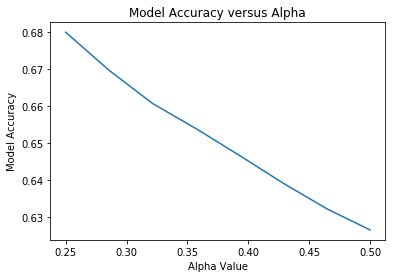

In [7]:
plt.plot(x, y)
plt.ylabel('Model Accuracy')
plt.xlabel('Alpha Value')
plt.title('Model Accuracy versus Alpha')

In [6]:
x = list(summary['alpha'][0:8])
y = list(summary['model_accuracy'][0:8])
print(x)
print(y)

[0.25, 0.2857142857142857, 0.3214285714285714, 0.35714285714285715, 0.39285714285714285, 0.42857142857142855, 0.4642857142857143, 0.5]
[0.67995, 0.66965, 0.6607, 0.6539, 0.64664, 0.63919, 0.63229, 0.62654]


# What is the best experiment?
Here, we measure _goodness_ of an experiment by its max model accuracy, over all trials.

In [4]:
summary_stat = summary.groupby('__commitHash__')['model_accuracy'].max()
summary_stat

__commitHash__
e797841f939ff75c2f2a29f79c161cad280030ba    0.79514
Name: model_accuracy, dtype: float64

In [5]:
best_commit_hash = summary_stat.idxmax()
best_commit_hash[0:5] + '...'

'e7978...'

# What is the best trial, given the best experiment?

In [ ]:
best_index = summary.loc[summary['__commitHash__'] == best_commit_hash]['model_accuracy'].idxmax()
best_trial = summary.iloc[best_index]['__trialNum__']
best_trial

# So the former experiment is better than the latter. What changed?

In [ ]:
versions = summary.__commitHash__.unique()
most_recent, least_recent = versions

In [ ]:
jarvis.diffExperimentVersions('twitter_demo', least_recent, most_recent)

# Let's get the best model yet!
From the best trial, from the best experiment

In [ ]:
best_model = jarvis.checkoutArtifact('twitter_demo', best_trial, best_commit_hash, 'model.pkl')

# Here's the best model in action

In [ ]:
country_dict = best_model['country_dict']
classifier = best_model['classifier']
vectorizer = best_model['vectorizer']

code_dict = {}

for kee in country_dict:
    code_dict[country_dict[kee]] = kee

while True:
    tweet = input("What's on your mind? ")
    if tweet == 'exit':
        break
    tweet_vec = vectorizer.transform(np.array([tweet,]))
    country_id = classifier.predict(tweet_vec)
    print("Predicted country of origin: {}\n".format(code_dict[country_id[0]]))